In [10]:
import numpy as np #array manipulations
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [11]:
#step - 1: define a dataset, and unlabelled Text
documents = [
    "The game was exciting and the crowd cheered",
    "A thrilling match with great goals and skill",
    "Local election debate focuses on public policy",
    "Vote today for better public services in the city",
    "New phone release: innovative camera and battery life",
    "Latest smartphone review praises camera and battery",
    "Delicious recipe for homemade pizza with fresh tomatoes",
    "Try this easy pizza recipe with a crispy crust"
]

In [12]:
#step - 2: feature extraction
vectoriser = TfidfVectorizer(stop_words='english') #feature extraction with removal of stop_words
X = vectoriser.fit_transform(documents)

In [13]:
#step - 3: cosine similarity matrix
cos_sim = cosine_similarity(X, X)
print("cosine similarity matrix:")
print(np.round(cos_sim, 2))

#apply k-means algorithm
k = 3 #humber of clusters as 3 cluster
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)

#print clusters
print("Document Clusters : ")
for i in range(k):
    print(f"\n Cluster {i}")
    for j,doc in enumerate(documents):
        if labels[j]==i:
            print(f"- {doc}")

cosine similarity matrix:
[[1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.12 0.   0.   0.   0.  ]
 [0.   0.   0.12 1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   1.   0.24 0.   0.  ]
 [0.   0.   0.   0.   0.24 1.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   1.   0.26]
 [0.   0.   0.   0.   0.   0.   0.26 1.  ]]
Document Clusters : 

 Cluster 0
- A thrilling match with great goals and skill
- Local election debate focuses on public policy
- Vote today for better public services in the city
- New phone release: innovative camera and battery life
- Latest smartphone review praises camera and battery

 Cluster 1
- Delicious recipe for homemade pizza with fresh tomatoes
- Try this easy pizza recipe with a crispy crust

 Cluster 2
- The game was exciting and the crowd cheered


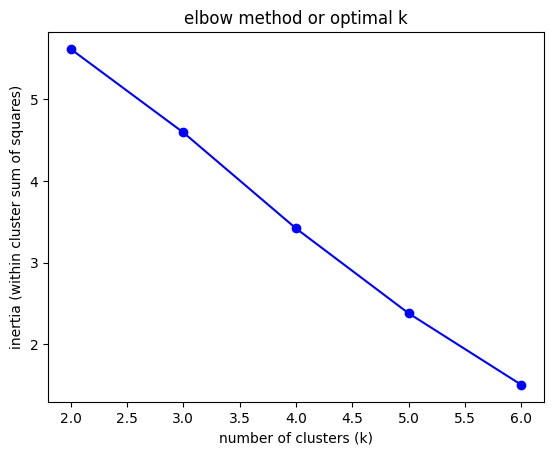

In [14]:
#step - 4: elbow method
inertias = []
K_range = range(2,7) #test 2-6 clusters
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertias.append(km.inertia_)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('number of clusters (k)')
plt.ylabel('inertia (within cluster sum of squares)')
plt.title('elbow method or optimal k')
plt.show()

In [15]:
# Step5 : Silhouette scores
silhouette_scores=[]
k_range=range(2,7)
for k in k_range:
    km=KMeans(n_clusters=k,random_state=42)
    labels=km.fit_predict(X)

### interpretation:
1. too few documents (8 total)
2. each cluster ends up with 1-2 documents -> sillhoutte becomes unstable
3. TF-IDF vectors in small text corpora dont show strong structure